# Przetwarzanie sygna≈Ç√≥w

## Zadanie 1

#### a) Przeanalizuj poni≈ºszy skrypt

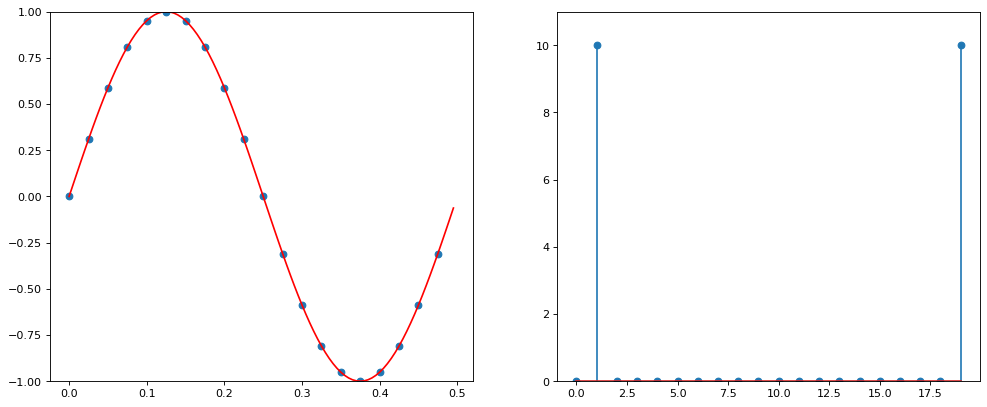

In [1]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu (okresow)
w = 40       # Czƒôstotliwoƒáƒá probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy pr√≥bkƒô)

t = np.arange(0, LP*T, TW) # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
n = len(t)                 # Liczba pr√≥bek

signal = f(t)   

#--- Rysujemy sygna≈Ç (niebieskie k√≥≈Çka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygna≈Ç przed spr√≥bkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal)
signal1 = abs(signal1) # modu≈Ç

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*');

**UWAGA**: do dalszych ƒáwicze≈Ñ warto powy≈ºszy skrypt przekszta≈Çciƒá na funkcjƒô o wielu argumentach, typu: amplituda, czƒôstotliwo≈õƒá pr√≥bkowania, liczba przebieg√≥w. Oczywi≈õcie dla wygody, nale≈ºy nadaƒá warto≈õci domy≈õlne argumentom funkcji.t:

UWAGA DLA CHƒòTNYCH: mo≈ºna wykorzystaƒá 'interact', dziƒôki kt√≥remu mo≈ºna zmieniac parametry danej funkcji i na bie≈ºƒÖco obserwowaƒá zmiany. Poni≈ºszy kod przedstawia spos√≥b wykorzystania interact:

In [2]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=‚Ä¶

<function __main__.prosta(a=2, b=0)>

In [3]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

def plot_fft(w=40, F=2.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygna≈Çu i jego widma FFT.
    
    Argumenty:
        w (float): Czƒôstotliwo≈õƒá pr√≥bkowania [Hz].
        F (float): Czƒôstotliwo≈õƒá sygna≈Çu [Hz].
        LP (int): Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu.
        A (float): Amplituda sygna≈Çu.
        func (callable, optional): Funkcja sygna≈Çu. Je≈õli None, u≈ºywa sinusoidy.
    """
    T = 1 / F      # Okres sygna≈Çu [s]
    TW = 1 / w     # Okres pr√≥bkowania [s]

    # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba pr√≥bek

    # Je≈õli nie podano funkcji, domy≈õlnie sygna≈Ç sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygna≈Çu
    signal = func(t)

    # Rysowanie sygna≈Çu (niebieskie k√≥≈Çka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Pr√≥bki")
    
    # Rysowanie sygna≈Çu ciƒÖg≈Çego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygna≈Ç ciƒÖg≈Çy")
    ax.set_title("Sygna≈Ç w dziedzinie czasu")
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft.fft(signal)
    signal_fft = abs(signal_fft)  # Modu≈Ç
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # Rzeczywiste czƒôstotliwo≈õci
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")
    ax.set_ylabel("Amplituda")
    plt.show()


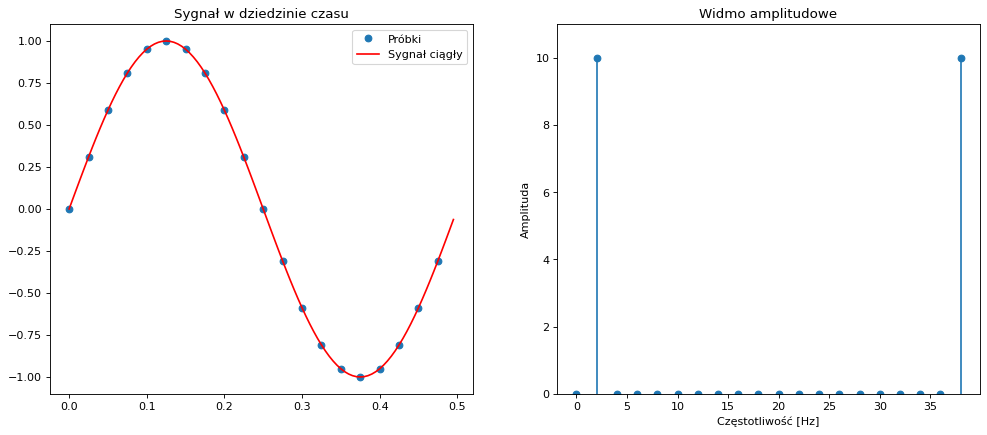

In [4]:
plot_fft(w=40, F=2.0, LP=1, A=1)

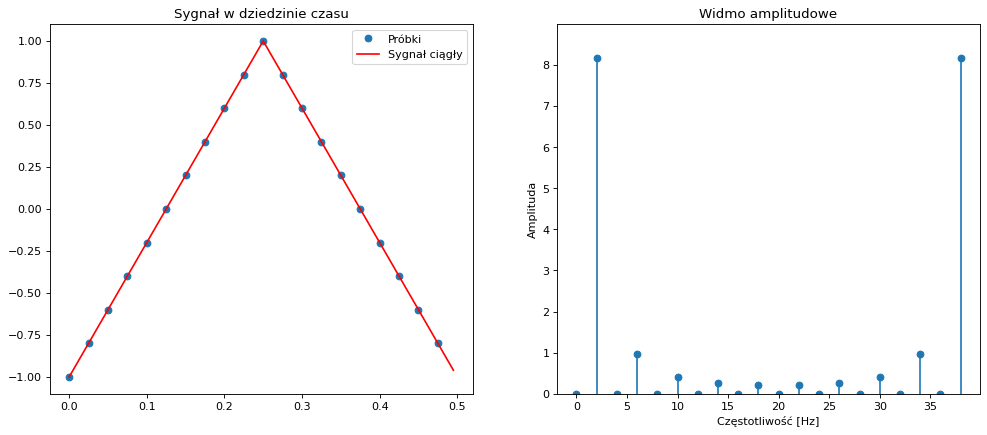

In [5]:
from scipy.signal import sawtooth
plot_fft(w=40, F=2.0, LP=1, A=1, func=lambda t: A * sawtooth(2 * pi * F * t, 0.5))

#### b) Zmie≈Ñ czƒôstotliwo≈õƒá pr√≥bkowania na 50Hz.

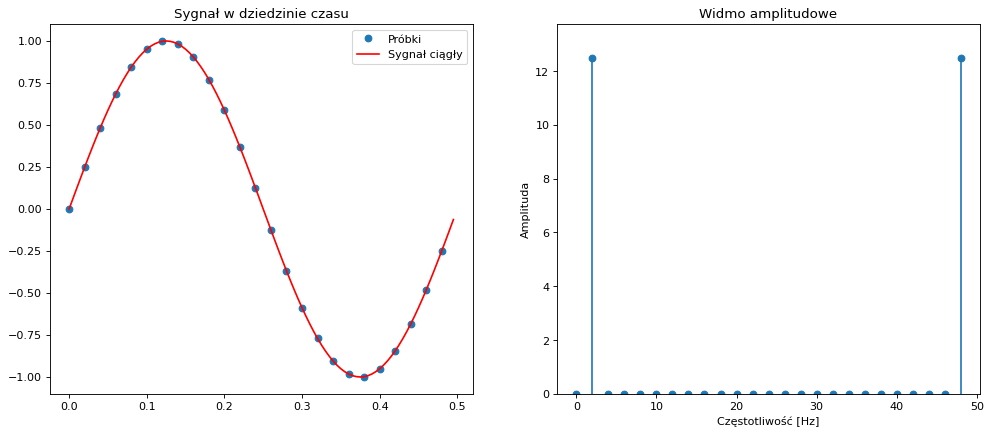

In [6]:
plot_fft(w=50, F=2.0, LP=1, A=1)

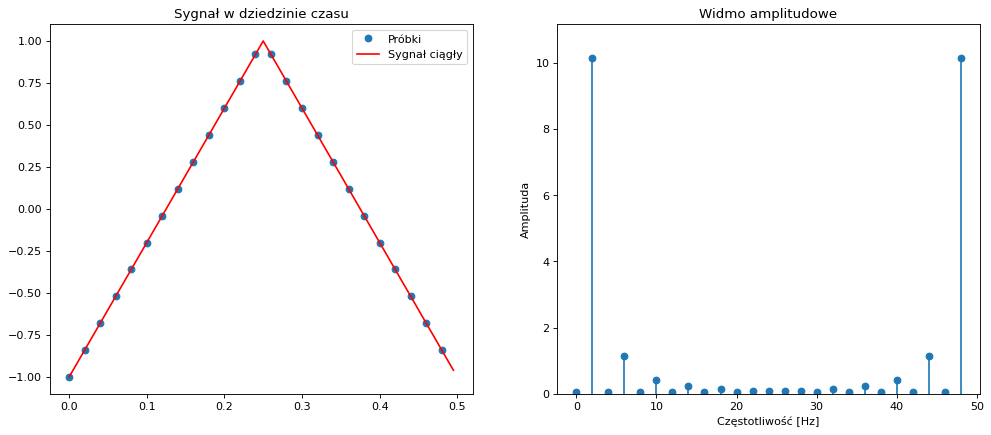

In [7]:
from scipy.signal import sawtooth
plot_fft(w=50, F=2.0, LP=1, A=1, func=lambda t: A * sawtooth(2 * pi * F * t, 0.5))

#### c) Punkty na osi OX spektrum sƒÖ teraz kolejnymi liczbami naturalnymi, a nie czƒôstotliwo≈õciami w Hz. Popraw skrypt (funkcje), tak aby o≈õ OX spektrum by≈Ça w Hz (podpowied≈∫: o≈õ OX rozpoczyna siƒô od 0Hz, a ko≈Ñczy siƒô na (prawie!) Hz, gdzie jest czƒôstotliwo≈õciƒÖ pr√≥bkowania). Nastƒôpnie: Upewnij siƒô, ≈ºe spektrum dla 1Hz-owego sinusa i piƒôciu (LP=5) analizowanych przebieg√≥w wyglƒÖda teraz prawid≈Çowo.

In [8]:
from pylab import *
from numpy import *
import math
from scipy.signal import sawtooth  # Importujemy sawtooth z scipy.signal
from ipywidgets import *

def plot_fft(w=40, F=2.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygna≈Çu i jego widma FFT.
    
    Argumenty:
        w (float): Czƒôstotliwo≈õƒá pr√≥bkowania [Hz].
        F (float): Czƒôstotliwo≈õƒá sygna≈Çu [Hz].
        LP (int): Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu.
        A (float): Amplituda sygna≈Çu.
        func (callable, optional): Funkcja sygna≈Çu. Je≈õli None, u≈ºywa sinusoidy.
    """
    T = 1 / F      # Okres sygna≈Çu [s]
    TW = 1 / w     # Okres pr√≥bkowania [s]

    # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba pr√≥bek

    # Je≈õli nie podano funkcji, domy≈õlnie sygna≈Ç sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygna≈Çu
    signal = func(t)

    # Rysowanie sygna≈Çu (niebieskie k√≥≈Çka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Pr√≥bki")
    
    # Rysowanie sygna≈Çu ciƒÖg≈Çego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygna≈Ç ciƒÖg≈Çy")
    ax.set_title("Sygna≈Ç w dziedzinie czasu")
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft.fft(signal)
    signal_fft = abs(signal_fft)  # Modu≈Ç
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # O≈õ czƒôstotliwo≈õci w Hz
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")  # Rysujemy FFT
    ax.set_xlim([0, w])
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")
    ax.set_ylabel("Amplituda")
    plt.show()


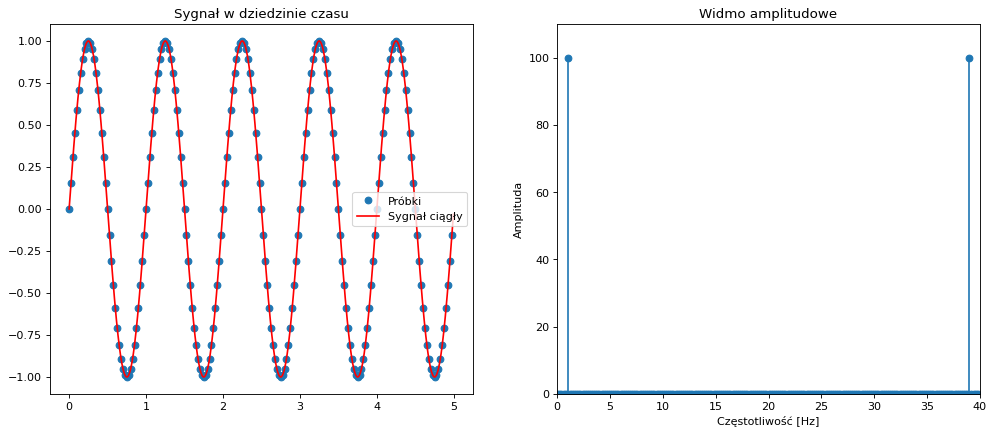

In [9]:
plot_fft(w=40, F=1.0, LP=5, A=1)

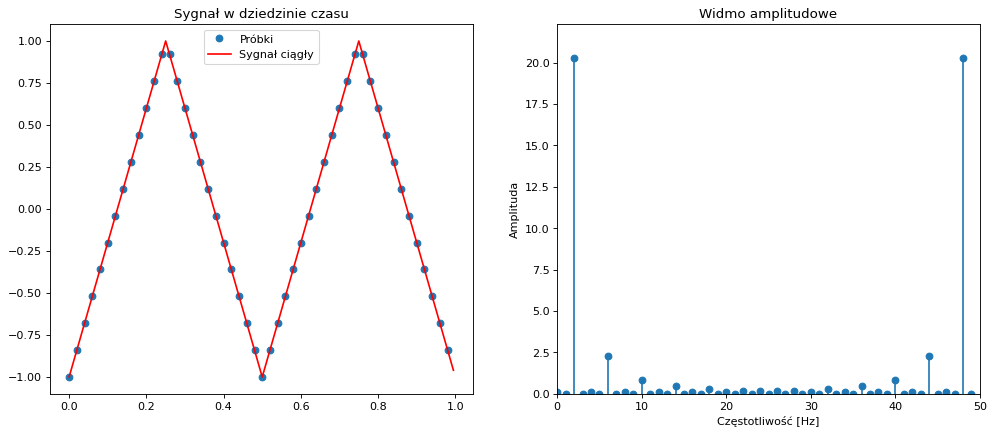

In [10]:
plot_fft(w=50, F=3.0, LP=3, A=1, func=lambda t: A * sawtooth(2 * pi * F * t, 0.5))

#### d) Podpisz osie obu wykres√≥w, u≈ºywajƒÖc funkcji xlabel() i ylabel(). Pamiƒôtaj o jednostkach.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi

def plot_fft(w=20, F=5.0, LP=20, A=1, func=None):
    """
    Funkcja do analizy sygna≈Çu i jego widma FFT.
    
    Argumenty:
        w (float): Czƒôstotliwo≈õƒá pr√≥bkowania [Hz].
        F (float): Czƒôstotliwo≈õƒá sygna≈Çu [Hz].
        LP (int): Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu.
        A (float): Amplituda sygna≈Çu.
        func (callable, optional): Funkcja sygna≈Çu. Je≈õli None, u≈ºywa sinusoidy.
    """
    T = 1 / F      # Okres sygna≈Çu [s]
    TW = 1 / w     # Okres pr√≥bkowania [s]

    # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba pr√≥bek

    # Je≈õli nie podano funkcji, domy≈õlnie sygna≈Ç sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygna≈Çu
    signal = func(t)

    # Rysowanie sygna≈Çu (niebieskie k√≥≈Çka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Pr√≥bki")
    
    # Rysowanie sygna≈Çu ciƒÖg≈Çego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygna≈Ç ciƒÖg≈Çy")
    ax.set_title("Sygna≈Ç w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")  # Etykieta osi X
    ax.set_ylabel("Amplituda")  # Etykieta osi Y
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft(signal)
    signal_fft = abs(signal_fft)  # Modu≈Ç
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # O≈õ czƒôstotliwo≈õci w Hz
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")  # Rysujemy FFT
    ax.set_xlim([0, w])
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")  # Etykieta osi X
    ax.set_ylabel("Warto≈õƒá modu≈Çu czƒô≈õci zespolonej")  # Etykieta osi Y
    plt.show()

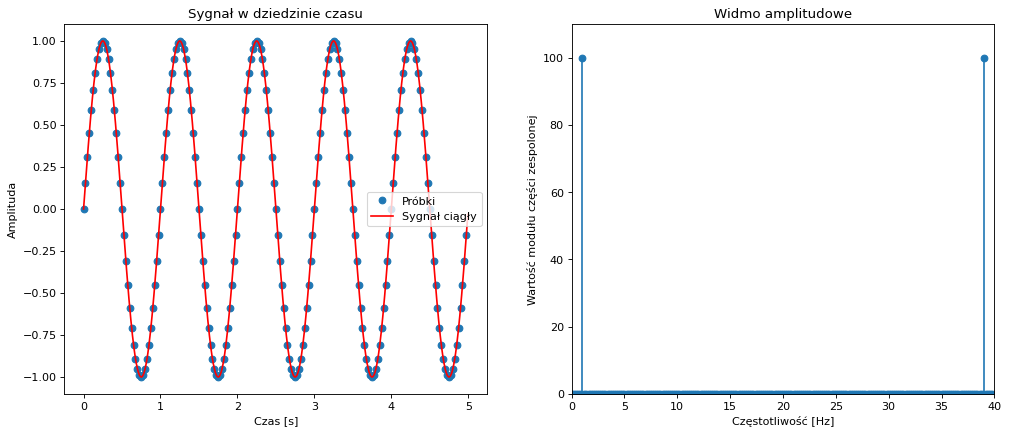

In [12]:
plot_fft(w=40, F=1.0, LP=5, A=1)

#### e) Wygeneruj spektrum dla funkcji sinus o czƒôstotliwo≈õciach 5Hz i 21Hz, dla czestotliwo≈õci pr√≥bkowania 20Hz i 20 (LP=20) analizowanych przebieg√≥w. <font color='red'> Czy rozpoznajesz te funkcje patrzƒÖc na ich spr√≥bkowane wykresy? </font> Odczytaj w drugim przypadku uzyskanƒÖ czƒôstotliwo≈õƒá z FFT. <font color='red'>Dlaczego uzyskano taki wynik? </font>

Dla czƒôstotliwo≈õci 5 Hz:


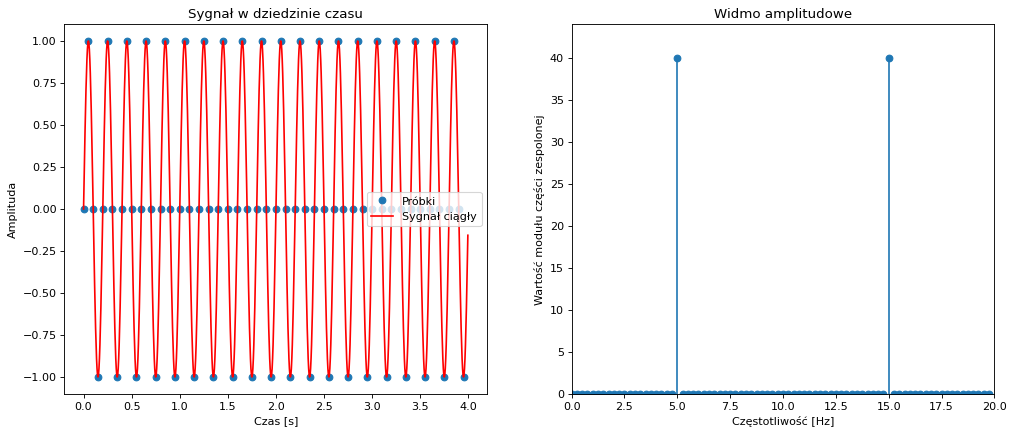

In [13]:
print("Dla czƒôstotliwo≈õci 5 Hz:")
plot_fft(w=20, F=5.0, LP=20, A=1)

Dla czƒôstotliwo≈õci 21 Hz:


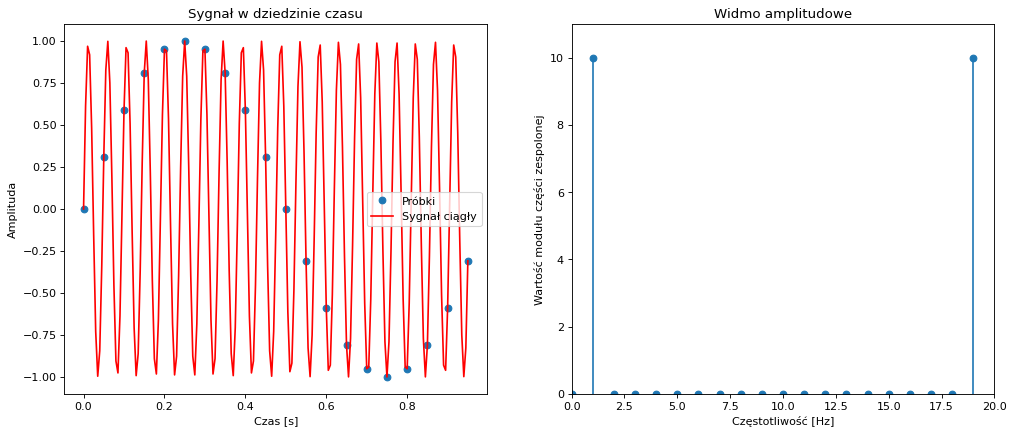

In [14]:
print("Dla czƒôstotliwo≈õci 21 Hz:")
plot_fft(w=20, F=21.0, LP=20, A=1)

# Analiza wynik√≥w
1. Spr√≥bkowanie funkcji sinusoidalnej 5 Hz:
O≈õ X dla wykresu w dziedzinie czasu (t) pokazuje pr√≥bki sygna≈Çu w czasie (sekundy).
Widmo FFT powinno wykazaƒá wyra≈∫ny pik w okolicy 5 Hz, poniewa≈º sygna≈Ç ma czƒôstotliwo≈õƒá 5 Hz.
Spr√≥bkowane warto≈õci bƒôdƒÖ dok≈Çadnie odwzorowywaƒá pe≈Çny cykl sinusoidalny, poniewa≈º czƒôstotliwo≈õƒá pr√≥bkowania (20 Hz) jest wiƒôksza ni≈º dwukrotno≈õƒá czƒôstotliwo≈õci sygna≈Çu (czyli 2 * 5 Hz = 10 Hz), co spe≈Çnia kryterium Nyquista.
2. Spr√≥bkowanie funkcji sinusoidalnej 21 Hz:
O≈õ X dla wykresu w dziedzinie czasu r√≥wnie≈º pokazuje pr√≥bki sygna≈Çu w czasie.
Zauwa≈ºysz, ≈ºe czƒôstotliwo≈õƒá pr√≥bkowania (20 Hz) jest mniejsza ni≈º dwukrotno≈õƒá czƒôstotliwo≈õci sygna≈Çu (21 Hz), co ≈Çamie zasadƒô Nyquista.
W wyniku tego, sygna≈Ç o czƒôstotliwo≈õci 21 Hz bƒôdzie aliasowany, a na widmie FFT pojawi siƒô zniekszta≈Çcenie w postaci innej czƒôstotliwo≈õci, bliskiej czƒôstotliwo≈õci pr√≥bkowania (ok. 1 Hz). Jest to efektem aliasingu, gdzie czƒôstotliwo≈õƒá powy≈ºej Nyquista zostaje "zawr√≥cona" do ni≈ºszego pasma, tworzƒÖc artefakt w analizie.
Dlaczego uzyskano taki wynik?
Sygna≈Ç 5 Hz: Czƒôstotliwo≈õƒá pr√≥bkowania 20 Hz jest wystarczajƒÖca, by poprawnie odwzorowaƒá ten sygna≈Ç bez aliasingu (poniewa≈º 
ùêπ_probkowania>2‚ãÖùêπ_sygna≈Çu).

Sygna≈Ç 21 Hz: Czƒôstotliwo≈õƒá pr√≥bkowania 20 Hz jest mniejsza ni≈º dwukrotno≈õƒá czƒôstotliwo≈õci sygna≈Çu (czyli 40 Hz), wiƒôc czƒôstotliwo≈õƒá pr√≥bkowania nie jest wystarczajƒÖca do wiernego odwzorowania sygna≈Çu. W rezultacie, sygna≈Ç 21 Hz ulega aliasingowi, czyli zniekszta≈Çceniu, kt√≥re powoduje, ≈ºe widmo FFT pokazuje b≈ÇƒôdnƒÖ, ni≈ºszƒÖ czƒôstotliwo≈õƒá (1 Hz w tym przypadku).

Podsumowanie:
Dla 5 Hz: Spr√≥bkowanie jest prawid≈Çowe, a wynik FFT jest poprawny.
Dla 21 Hz: Ze wzglƒôdu na aliasing, wynik FFT pokazuje czƒôstotliwo≈õƒá 1 Hz, poniewa≈º sygna≈Ç nie zosta≈Ç poprawnie odwzorowany (czƒôstotliwo≈õƒá pr√≥bkowania nie spe≈Çnia zasady Nyquista).

#### f) Por√≥wnaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia siƒô warto≈õƒá na osi OY na wykresie spektrum</font>?

Funkcja sin(F*2*pi*t):


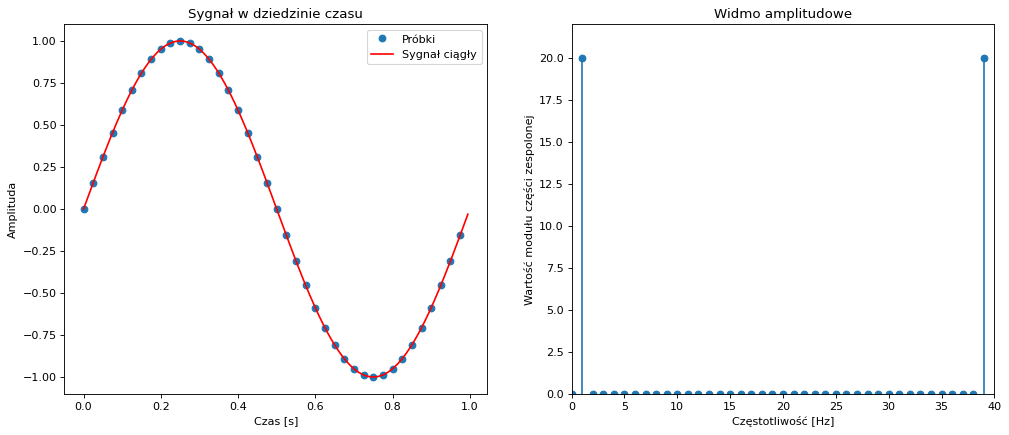

In [15]:
print("Funkcja sin(F*2*pi*t):")
plot_fft(w=40, F=1, LP=1, A=1)

Funkcja 2*sin(F*2*pi*t):


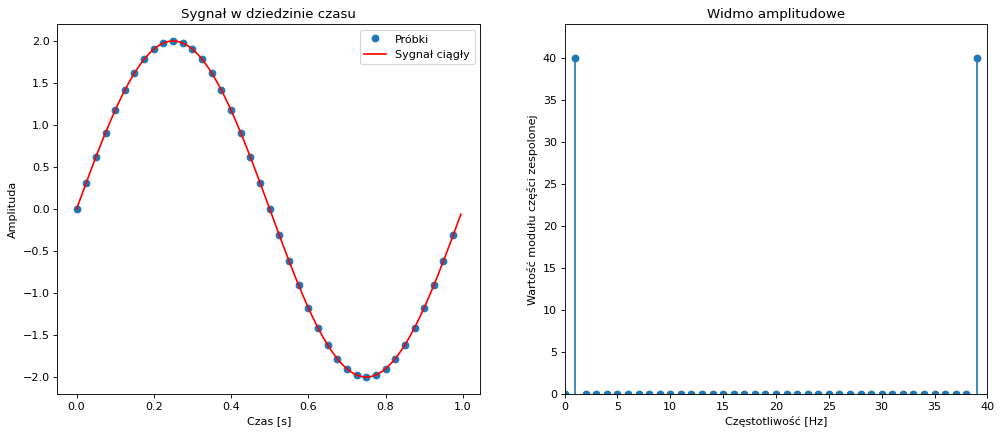

In [16]:
print("Funkcja 2*sin(F*2*pi*t):")
plot_fft(w=40, F=1, LP=1, A=2)

Funkcja 3*sin(F*2*pi*t):


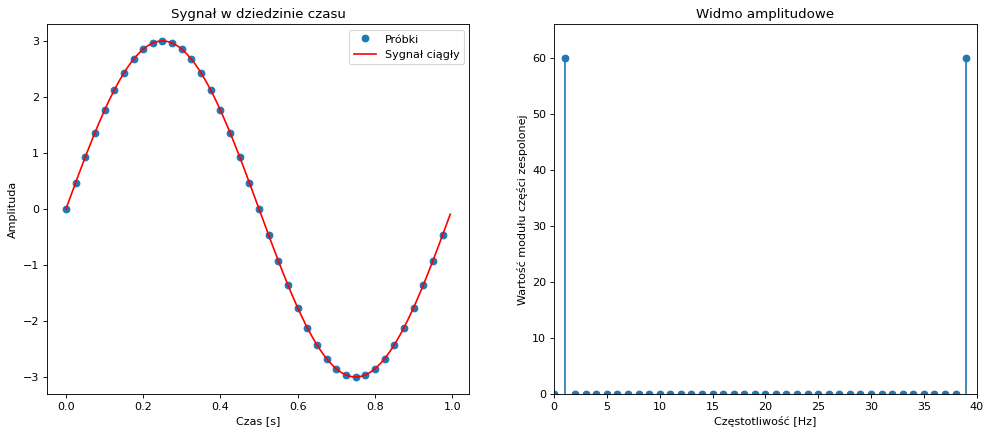

In [17]:
print("Funkcja 3*sin(F*2*pi*t):")
plot_fft(w=40, F=1, LP=1, A=3)

#### g) Ile punkt√≥w jest na wykresach przy czƒôstotliwo≈õci pr√≥bkowania 50Hz, $T=1s$? Zwiƒôksz dwukrotnie liczbƒô pr√≥bek poprzez zwiƒôkszenie czƒôstotliwoƒôci pr√≥bkowania. Nastƒôpnie: dla $sin(F*2\pi t)$ por√≥wnaj warto≈õƒá na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

### Krok 1: Liczba punkt√≥w na wykresach przy czƒôstotliwo≈õci pr√≥bkowania 50 Hz

1. Czƒôstotliwo≈õƒá pr√≥bkowania \( f_s = 50 \) Hz oznacza, ≈ºe pr√≥bki sƒÖ pobierane co \( T_w = \frac{1}{50} \) sekundy.
2. Przy okresie sygna≈Çu \( T = 1 \) sekunda (czyli \( F = 1 \) Hz), liczba pr√≥bek \( n \) na wykresie bƒôdzie wynosi≈Ça:
   \[
   n = f_s \times T = 50 \times 1 = 50 \text{ pr√≥bek}.
   \]

### Krok 2: Zwiƒôkszenie czƒôstotliwo≈õci pr√≥bkowania dwukrotnie

Teraz zwiƒôkszymy czƒôstotliwo≈õƒá pr√≥bkowania do 100 Hz, co oznacza, ≈ºe pr√≥bki bƒôdƒÖ pobierane co \( T_w = \frac{1}{100} \) sekundy, a liczba pr√≥bek bƒôdzie wynosi≈Ça:
\[
n = 100 \times 1 = 100 \text{ pr√≥bek}.
\]

### Krok 3: Por√≥wnanie warto≈õci na osi OY spektrum przy r√≥≈ºnych czƒôstotliwo≈õciach pr√≥bkowania

Po zwiƒôkszeniu czƒôstotliwo≈õci pr√≥bkowania dwukrotnie, spodziewamy siƒô, ≈ºe amplituda na widmie FFT pozostanie mniej wiƒôcej taka sama, ale zyskamy wy≈ºszƒÖ rozdzielczo≈õƒá czƒôstotliwo≈õciowƒÖ w widmie. Oznacza to, ≈ºe:

* Przy wy≈ºszej czƒôstotliwo≈õci pr√≥bkowania otrzymamy wiƒôcej punkt√≥w na wykresie FFT, co pozwoli na dok≈ÇadniejszƒÖ reprezentacjƒô sygna≈Çu.
* Amplituda na widmie (o≈õ OY) mo≈ºe byƒá nieco r√≥≈ºna, poniewa≈º wy≈ºsze czƒôstotliwo≈õci pr√≥bkowania mogƒÖ wp≈ÇynƒÖƒá na dok≈Çadno≈õƒá oblicze≈Ñ FFT, ale po normalizacji warto≈õci FFT, amplituda powinna pozostaƒá taka sama.pozostaƒá taka sama.


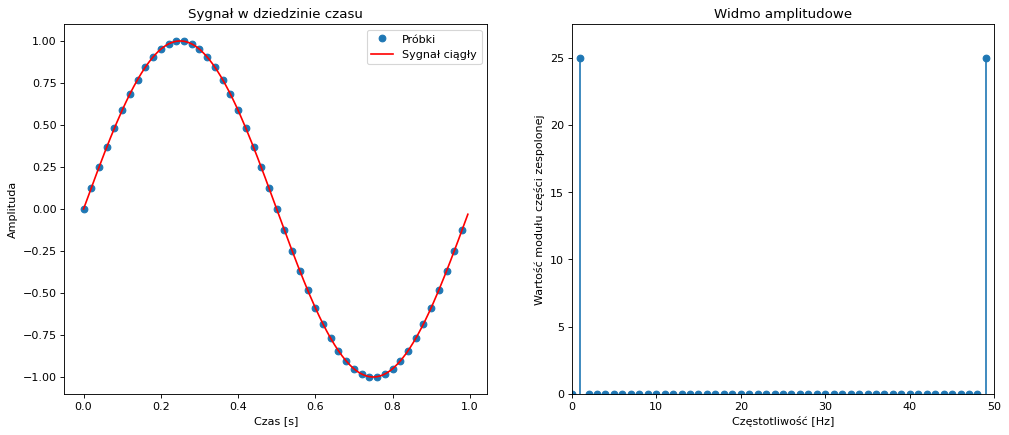

In [18]:
plot_fft(w=50, F=1, LP=1, A=1)

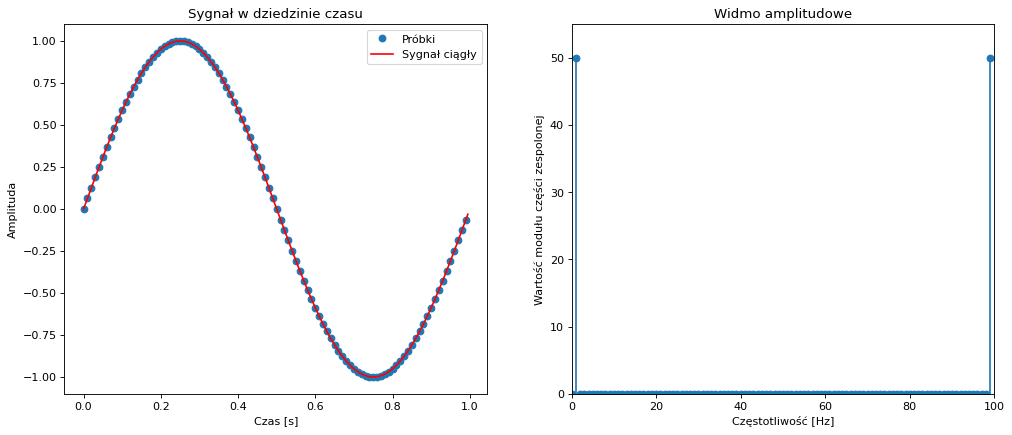

In [19]:
plot_fft(w=100, F=1, LP=1, A=1)

#### h) Na podstawie wynik√≥w uzyskanych w dw√≥ch poprzednich punktach przeskaluj o≈õ OY spektrum tak, aby wskazywa≈Ça warto≈õci amplitud badanych sygna≈Ç√≥w. Sprawd≈∫ wyniki dla kilku wybranych funkcji (tu fajnie u≈ºyƒá interact), czƒôstotliwo≈õci pr√≥bkowania oraz rozwa≈ºanych liczb punkt√≥w. Pamiƒôtaj o wysokim LP.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi

def plot_fft(w=20, F=5.0, LP=20, A=1, func=None):
    """
    Funkcja do analizy sygna≈Çu i jego widma FFT.
    
    Argumenty:
        w (float): Czƒôstotliwo≈õƒá pr√≥bkowania [Hz].
        F (float): Czƒôstotliwo≈õƒá sygna≈Çu [Hz].
        LP (int): Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu.
        A (float): Amplituda sygna≈Çu.
        func (callable, optional): Funkcja sygna≈Çu. Je≈õli None, u≈ºywa sinusoidy.
    """
    T = 1 / F      # Okres sygna≈Çu [s]
    TW = 1 / w     # Okres pr√≥bkowania [s]

    # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba pr√≥bek

    # Je≈õli nie podano funkcji, domy≈õlnie sygna≈Ç sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygna≈Çu
    signal = func(t)

    # Rysowanie sygna≈Çu (niebieskie k√≥≈Çka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Pr√≥bki")
    
    # Rysowanie sygna≈Çu ciƒÖg≈Çego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygna≈Ç ciƒÖg≈Çy")
    ax.set_title("Sygna≈Ç w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")  # Etykieta osi X
    ax.set_ylabel("Amplituda")  # Etykieta osi Y
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft(signal)
    signal_fft = abs(signal_fft)  # Modu≈Ç

    # Normalizacja FFT (dzielenie przez liczbƒô pr√≥bek)
    signal_fft /= n//2
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # O≈õ czƒôstotliwo≈õci w Hz
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")  # Rysujemy FFT
    ax.set_xlim([0, w])
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")  # Etykieta osi X
    ax.set_ylabel("Warto≈õƒá modu≈Çu czƒô≈õci zespolonej")  # Etykieta osi Y
    plt.show()

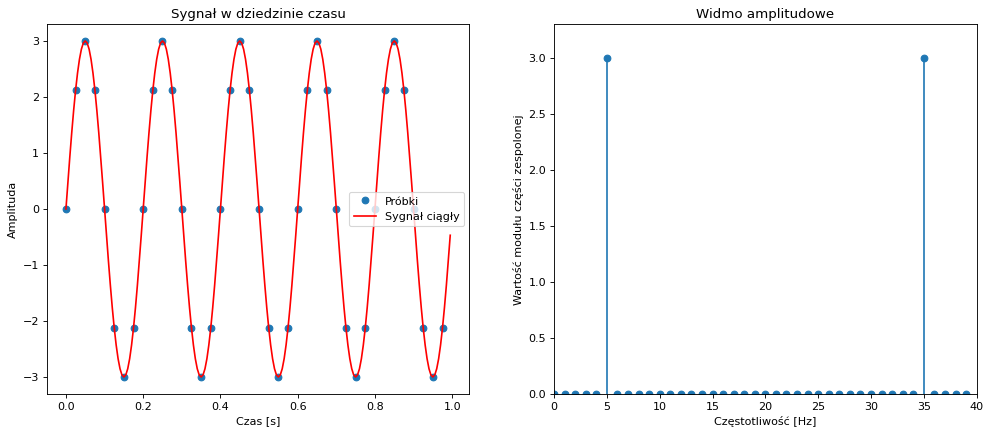

In [21]:
plot_fft(w=40, F=5, LP=5, A=3)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi
from ipywidgets import interact, FloatSlider

# Funkcja do analizy sygna≈Çu i jego widma FFT
def plot_fft(w=50, F=5.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygna≈Çu i jego widma FFT.
    
    Argumenty:
        w (float): Czƒôstotliwo≈õƒá pr√≥bkowania [Hz].
        F (float): Czƒôstotliwo≈õƒá sygna≈Çu [Hz].
        LP (int): Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu.
        A (float): Amplituda sygna≈Çu.
        func (callable, optional): Funkcja sygna≈Çu. Je≈õli None, u≈ºywa sinusoidy.
    """
    T = 1 / F      # Okres sygna≈Çu [s]
    TW = 1 / w     # Okres pr√≥bkowania [s]

    # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba pr√≥bek

    # Je≈õli nie podano funkcji, domy≈õlnie sygna≈Ç sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygna≈Çu
    signal = func(t)

    # Rysowanie sygna≈Çu (niebieskie k√≥≈Çka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Pr√≥bki")
    
    # Rysowanie sygna≈Çu ciƒÖg≈Çego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygna≈Ç ciƒÖg≈Çy")
    ax.set_title("Sygna≈Ç w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")  # Etykieta osi X
  


## Zadanie 2

#### Plik spots.txt zawiera warto≈õci aktywno≈õci S≈Ço≈Ñca w kolejnych miesiƒÖcach. Wykre≈õl ten sygna≈Ç oraz jego spektrum. Za pomocƒÖ FFT, oblicz czƒôstotliwo≈õƒá cyklu aktywno≈õci s≈Çonecznej. Pamiƒôtaj aby przeskalowaƒá o≈õ OX na wykresie spektrum. Mo≈ºesz przyjƒÖƒá jako rozpatrywany okres rok, w√≥wczas czƒôstotliwo≈õƒá pr√≥bkowania bƒôdzie wynosi≈Ça 12.

In [23]:
dane = []
def read_data(file_name):
    with open(file_name, 'r') as file:
        dane = file.readlines()
        dane = np.genfromtxt(dane, dtype=float)
        print(dane)
        print(max(dane))
        print(len(dane)/12)
read_data("spots.txt")

[24.1 25.1 26.6 ... 76.3 36.4 31.4]
78.9
211.83333333333334


Maksymalna warto≈õƒá widma: 3.950181899881217
Czƒôstotliwo≈õƒá cyklu: 0.09 cykle/rok
Okres cyklu: 11.15 lata


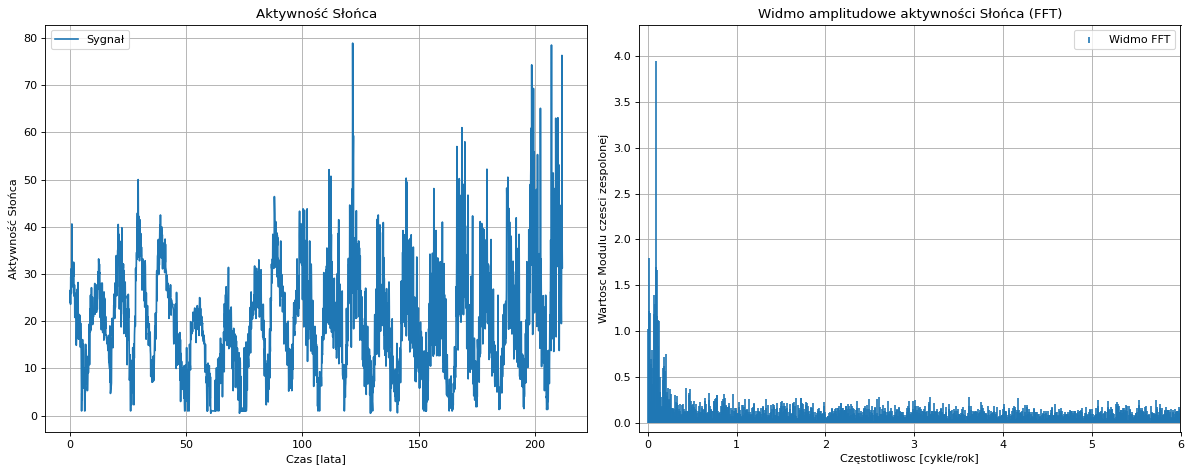

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def zad2(file_path, w):
    # Wczytanie danych z pliku
    dane = np.genfromtxt(file_path, dtype=float)

    # Parametry sygna≈Çu
    n = len(dane)
    TW = 1 / w  # Okres pr√≥bkowania [s]
    t = np.arange(0, n * TW, TW)  # O≈õ czasu

    # FFT sygna≈Çu
    signal_fft = np.abs(fft(dane, norm='forward'))
    freqs = fftfreq(n, TW)[:n // 2]  # Tylko czƒôstotliwo≈õci dodatnie

    # Maksymalna warto≈õƒá widma (bez DC)
    max_y = max(signal_fft[1:])
    dominant_freq_index = np.argmax(signal_fft[1:]) + 1
    dominant_freq = freqs[dominant_freq_index]
    cycle_period = 1 / dominant_freq

    print(f"Maksymalna warto≈õƒá widma: {max_y}")
    print(f"Czƒôstotliwo≈õƒá cyklu: {dominant_freq:.2f} cykle/rok")
    print(f"Okres cyklu: {cycle_period:.2f} lata")

    # Przygotowanie wykres√≥w
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=80)

    # Wykres sygna≈Çu w dziedzinie czasu
    ax1.plot(t, dane, label="Sygna≈Ç")
    ax1.set_title("Aktywno≈õƒá S≈Ço≈Ñca")
    ax1.set_xlabel("Czas [lata]")
    ax1.set_ylabel("Aktywno≈õƒá S≈Ço≈Ñca")
    ax1.grid()
    ax1.legend()

    # Wykres widma amplitudowego
    ax2.stem(freqs[1:], signal_fft[1:n // 2], '-', basefmt=" ", label="Widmo FFT", markerfmt=' ')
    ax2.set_xlim([-0.1, w / 2])
    ax2.set_ylim([-0.1, 1.1 * max(signal_fft[1:])])
    ax2.set_title("Widmo amplitudowe aktywno≈õci S≈Ço≈Ñca (FFT)")
    ax2.set_xlabel("Czƒôstotliwosc [cykle/rok]")
    ax2.set_ylabel("Wartosc Modulu czesci zespolonej")
    ax2.grid()
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Wywo≈Çanie funkcji z plikiem "spots.txt"
zad2("spots.txt", 12)


## Zadanie 3

#### Proste filtrowanie. Wykre≈õl sygna≈Ç sin(2pit) + sin(4pit), T=1s, w=20Hz. Za pomocƒÖ FFT, przekszta≈Çƒá sygna≈Ç do dziedziny czƒôstotliwo≈õci. Nastƒôpnie usu≈Ñ sk≈Çadowe o czƒôstotliwo≈õci 2Hz. Tak zmodyfikowany sygna≈Ç przekszta≈Çƒá do dziedziny czasu i wykre≈õl go.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from numpy import pi

def plot_fft_zad3(w=20, F=1.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygna≈Çu i jego widma FFT, z mo≈ºliwo≈õciƒÖ filtrowania.
    
    Argumenty:
        w (float): Czƒôstotliwo≈õƒá pr√≥bkowania [Hz].
        F (float): Czƒôstotliwo≈õƒá sygna≈Çu [Hz].
        LP (int): Liczba analizowanych pe≈Çnych okres√≥w sygna≈Çu.
        A (float): Amplituda sygna≈Çu.
        func (callable, optional): Funkcja sygna≈Çu. Je≈õli None, u≈ºywa sinusoidy.
    """
    T = 1 / F      # Okres sygna≈Çu [s]
    TW = 1 / w     # Okres pr√≥bkowania [s]

    # Momenty, w kt√≥rych pobieramy pr√≥bki (o≈õ OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba pr√≥bek

    # Je≈õli nie podano funkcji, domy≈õlnie sygna≈Ç sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygna≈Çu
    signal = func(t)

    # FFT sygna≈Çu
    signal_fft = fft(signal)
    freqs = fftfreq(n, TW)  # Czƒôstotliwo≈õci odpowiadajƒÖce FFT

    # Usuwanie sk≈Çadowej o czƒôstotliwo≈õci 2 Hz
    filtered_fft = signal_fft.copy()
    filtered_fft[np.isclose(freqs, 2)] = 0  # Usuwanie dla f = 2 Hz
    filtered_fft[np.isclose(freqs, -2)] = 0  # Usuwanie dla f = -2 Hz

    # Odtwarzanie sygna≈Çu w dziedzinie czasu
    filtered_signal = np.real(ifft(filtered_fft))

    # Widmo amplitudowe sygna≈Çu filtrowanego
    filtered_fft_abs = abs(filtered_fft) / (n // 2)

    # Rysowanie wykres√≥w
    fig = plt.figure(figsize=(15, 10), dpi=80)

    # Sygna≈Ç oryginalny w dziedzinie czasu
    ax = fig.add_subplot(221)
    ax.plot(t, signal, 'o', label="Pr√≥bki (oryginalny)")
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygna≈Ç ciƒÖg≈Çy (oryginalny)")
    ax.set_title("Oryginalny sygna≈Ç w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

    # Widmo amplitudowe przed filtracjƒÖ
    ax = fig.add_subplot(222)
    signal_fft_abs = abs(signal_fft) / (n // 2)
    ax.stem(freqs[:n//2], signal_fft_abs[:n//2], '-*', basefmt=" ", label="Widmo przed filtracjƒÖ")
    ax.set_xlim([0, w // 2])
    ax.set_ylim([0, 1.1 * max(signal_fft_abs)])
    ax.set_title("Widmo amplitudowe przed filtracjƒÖ")
    ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

    # Sygna≈Ç przefiltrowany w dziedzinie czasu
    ax = fig.add_subplot(223)
    ax.stem(t, filtered_signal, '-*', label="Sygna≈Ç dyskretny (filtrowany)")
    ax.plot(t, filtered_signal, 'o', label="Pr√≥bki (filtrowane)")
    interp_t = np.linspace(t[0], t[-1], 200)  # Warto≈õci czasu do interpolacji
    interp_signal = np.interp(interp_t, t, filtered_signal)
    ax.plot(interp_t, interp_signal, linestyle='-', color='orange', label="Sygna≈Ç ciƒÖg≈Çy (filtrowany)")
    ax.set_title("Przefiltrowany sygna≈Ç w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")
    ax.set_xlim([0, T])
    ax.legend()
    ax.grid()
    
    # Widmo amplitudowe po filtracji
    ax = fig.add_subplot(224)
    ax.stem(freqs[:n//2], filtered_fft_abs[:n//2], '-*', basefmt=" ", label="Widmo po filtracji")
    ax.set_xlim([0, w / 2])
    ax.set_ylim([0, 1.1 * max(filtered_fft_abs)])
    ax.set_title("Widmo amplitudowe po filtracji")
    ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()


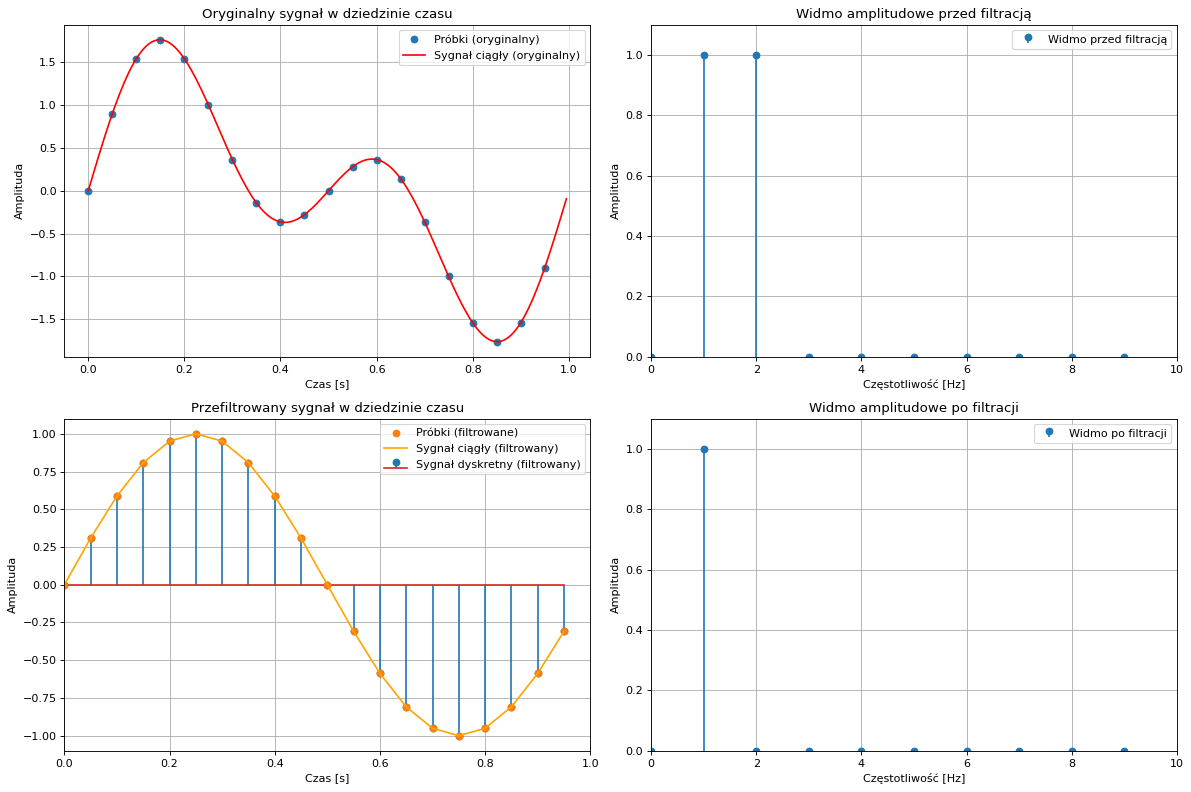

In [177]:
plot_fft_zad3(w=20, F=1.0, LP=1, A=1, func=lambda t: A * (np.sin(2 * pi * t) + np.sin(4 * pi * t)))

## Zadanie 4

#### Wczytaj plik err.wav. Wykre≈õl jego spektrum. Spr√≥buj tak≈ºe skali logarytmicznej. Okre≈õl dominujƒÖce w sygnale czƒôstotliwo≈õci.

1258.0


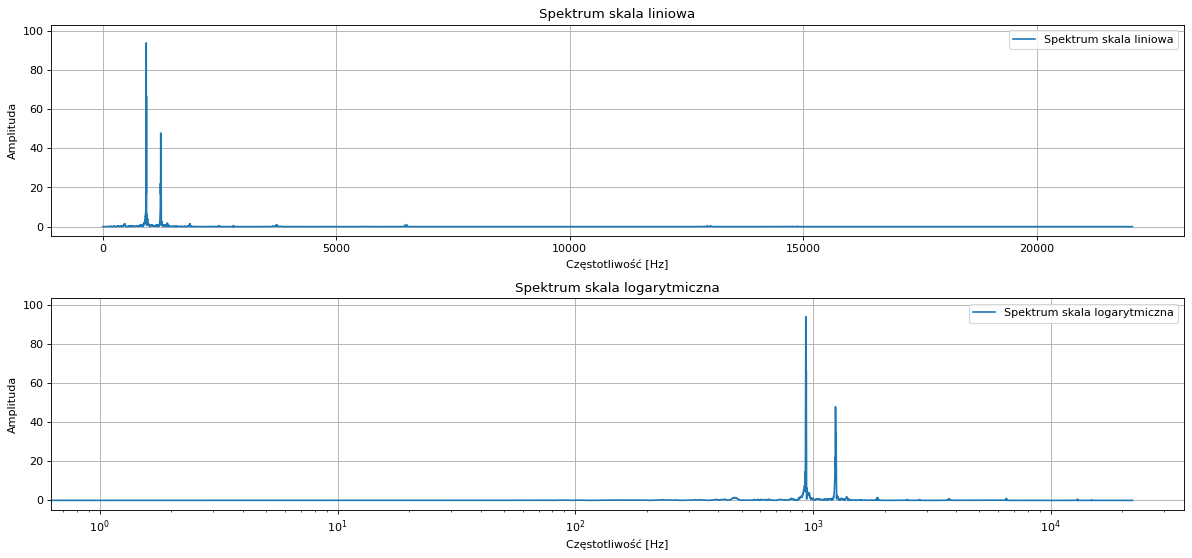

In [38]:
from playsound import playsound
from scipy.io import wavfile

# Wczytywanie pliku wav
# samplerate to czƒôstotliwo≈õƒá pr√≥bkowania, data to pr√≥bki
samplerate, signal = wavfile.read('err.wav')

# Sprawdzenie liczby pr√≥bek i liczby kana≈Ç√≥w
samples, channels = np.shape(signal)
#print(samples, channels)
if channels==2:
    signal=signal.mean(axis=1)
#plt.plot(range(samples), data[:,1])
print(max(signal))

n = len(signal)

 # FFT sygna≈Çu
signal_fft = fft(signal)
signal_fft = abs(signal_fft) #modu≈Ç
freqs = fftfreq(n, 1/samplerate)  # Czƒôstotliwo≈õci odpowiadajƒÖce FFT

# Normalizacja FFT (dzielenie przez liczbƒô pr√≥bek)
signal_fft /= n

# Rysowanie wykres√≥w
fig = plt.figure(figsize=(15, 10), dpi=80)

# Spektrum (skala liniowa)
ax = fig.add_subplot(311)
ax.plot(freqs[:n//2], signal_fft[:n//2], '-', label="Spektrum skala liniowa")
#ax.set_xlim([0, samplerate // 2)
ax.set_ylim([-5, 1.1 * max(signal_fft)])
ax.set_title("Spektrum skala liniowa")
ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")
ax.set_ylabel("Amplituda")
ax.legend()
ax.grid()

# Spektrum (skala logarytmiczna)
ax = fig.add_subplot(312)
ax.semilogx(freqs[:n//2], signal_fft[:n//2], '-', label="Spektrum skala logarytmiczna")
#ax.set_xlim([0, samplerate // 2])
ax.set_ylim([-5, 1.1 * max(signal_fft)])
ax.set_title("Spektrum skala logarytmiczna")
ax.set_xlabel("Czƒôstotliwo≈õƒá [Hz]")
ax.set_ylabel("Amplituda")
ax.legend()
ax.grid()

plt.tight_layout()

# Odtwarzanie d≈∫wiƒôku
#playsound('err.wav')